# Model Training and Testing Script

## Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

## Datasets

In [4]:
# read in the dataset
df = pd.read_csv('./agile_dataset/agile_dataset.csv')

df.head()

,Effort,Vi,D,V,Sprint Size,Work Days,Act:Time
0,156,4.2,0.687,2.7,10,22,63
1,202,3.7,0.701,2.5,10,21,92
2,173,4.0,0.878,3.3,10,22,56
3,331,4.5,0.886,3.8,10,22,86
4,124,4.9,0.903,4.2,10,22,32


In [5]:
print(len(df))

21


>There are 21 rows, 6 predictors, and 1 target in total

## Global Variables

In [6]:
TARGET = 'Act:Time'

#Choose all predictors except target & IDcols
PREDICTORS = [x for x in df.columns if x not in [TARGET]]

X = df[TARGET]
y = df[PREDICTORS]

## Model Fitting

In [7]:
def modelfit(alg, X_train, X_test, y_train, y_test, predictors, printFeatureImportance=True):
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)

    #Predict training set:
    Y_pred = alg.predict(X_test)
    diff = np.absolute(y_test-Y_pred)
    MRE = diff/y_test
    MMRE = np.mean(MRE)
    MAE = metrics.mean_absolute_error(y_test,Y_pred)
    
    #Print model report:
    print ("\nModel Report")
    print ("Average MMRE: %.4g" % MMRE)
    print ("Average MAE: %.4g" % MAE)

In [8]:
# split data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(df[PREDICTORS], df[TARGET], test_size=0.3)

### Bagging

In [9]:
bag = BaggingRegressor(random_state=42)
modelfit(bag, X_train, X_test, y_train, y_test, PREDICTORS)


Model Report
Average MMRE: 0.04472
Average MAE: 2.429


### AdaBoost

In [10]:
ada = AdaBoostRegressor(random_state=42)
modelfit(ada, X_train, X_test, y_train, y_test, PREDICTORS)


Model Report
Average MMRE: 0.0869
Average MAE: 5.286


### Random Forest Regressor

In [11]:
rf = RandomForestRegressor(random_state=42)
modelfit(rf, X_train, X_test, y_train, y_test, PREDICTORS)


Model Report
Average MMRE: 0.03048
Average MAE: 1.56


### Gradient Boosting

In [12]:
gbm0 = GradientBoostingRegressor(random_state=42)
modelfit(gbm0, X_train, X_test, y_train, y_test, PREDICTORS)


Model Report
Average MMRE: 0.043
Average MAE: 1.888


## Results
From the results above, we can see that the proposed models have similar MMRE but Random Forest Regressor outperforms the rest in terms of lower MAE. This model will not be optimized due to little effects of hyperparameters tuning on small dataset.

Text(0, 0.5, 'Feature Importance Score')

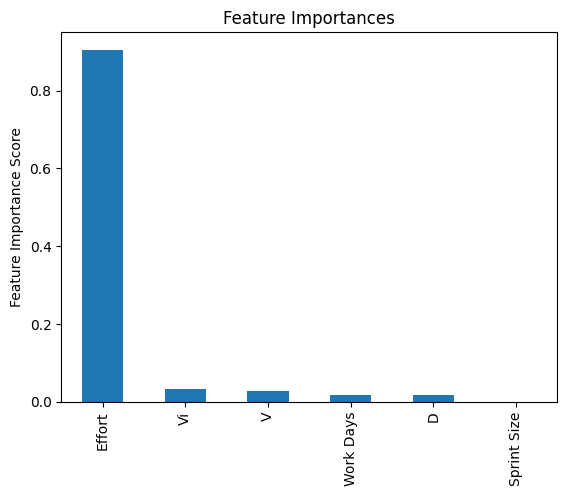

In [13]:
feat_imp = pd.Series(rf.feature_importances_, PREDICTORS).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

>Since the dataset is small, the entry values do not differ much from each other, hence the model will produce similar results to user input if the differences of field values are small

## Export Model

In [14]:
filename = "agile_trained_model.joblib"
joblib.dump(rf, filename)

['agile_trained_model.joblib']